In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

2023-12-06 17:50:27.678339: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 4s 92ms/step - loss: 0.5347 - acc: 0.7690 - val_loss: 0.4185 - val_acc: 0.8530
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3282 - acc: 0.8945 - val_loss: 0.3175 - val_acc: 0.8852
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2459 - acc: 0.9197 - val_loss: 0.3107 - val_acc: 0.8748
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1975 - acc: 0.9342 - val_loss: 0.2776 - val_acc: 0.8906
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1655 - acc: 0.9465 - val_loss: 0.2900 - val_acc: 0.8855
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1437 - acc: 0.9542 - val_loss: 0.2840 - val_acc: 0.8899
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1249 - acc: 0.9602 - val_loss: 0.2960 - val_acc: 0.8861
Epoch 8/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1037 - a

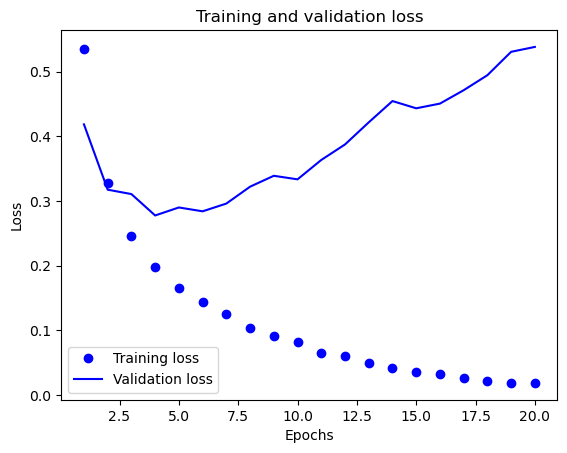

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


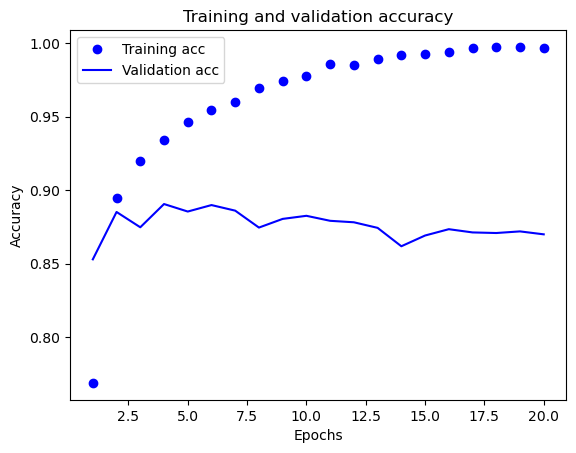

In [13]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [4]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


2023-12-06 17:54:42.442369: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/4
49/49 [==============================] - 2s 37ms/step - loss: 0.4810 - accuracy: 0.8114
Epoch 2/4
49/49 [==============================] - 2s 35ms/step - loss: 0.2839 - accuracy: 0.9019
Epoch 3/4
49/49 [==============================] - 2s 35ms/step - loss: 0.2223 - accuracy: 0.9192
Epoch 4/4
782/782 [==============================] - 5s 6ms/step - loss: 0.2960 - accuracy: 0.8813


In [5]:
results


[0.2960488498210907, 0.8813199996948242]

In [6]:
model.predict(x_test)

782/782 [==============================] - 4s 5ms/step


array([[0.28258458],
       [0.9997173 ],
       [0.93365294],
       ...,
       [0.12315985],
       [0.11201337],
       [0.7919455 ]], dtype=float32)

In [ ]:
## 88% de efectividad en predicciones